# Make finger-tapping ROI for experiment 3
Use Neurosynth meta-analysis and AAL atlas to create left and right finger-tapping ROIs in MNI space.

In [5]:
%matplotlib inline
from nilearn.datasets import fetch_atlas_aal, fetch_atlas_msdl
from nilearn import plotting
import nibabel as nib
import numpy as np
from scipy import ndimage

In [2]:
aal = fetch_atlas_aal()
aal_img = nib.load(aal['maps'])
aal_map = aal_img.get_data()
l_precentral_idx = int(aal['indices'][aal['labels'].index('Precentral_L')])
r_precentral_idx = int(aal['indices'][aal['labels'].index('Precentral_R')])
l_precentral = aal_map == l_precentral_idx
r_precentral = aal_map == r_precentral_idx

In [22]:
msdl = fetch_atlas_msdl()
#msdl['labels']
msdl_img = nib.load(msdl['maps'])
msdl_map = msdl_img.get_data()
striate_idx = int(msdl['labels'].index('Vis'))
striate_map = msdl_map[..., striate_idx]
striate_img = nib.Nifti1Image(striate_map, msdl_img.affine, header=msdl_img.header)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [23]:
np.unique(msdl_map)

array([0.00000000e+00, 8.61632725e-06, 1.25549523e-04, ...,
       5.71008026e-01, 5.80494232e-01, 5.86048558e-01])

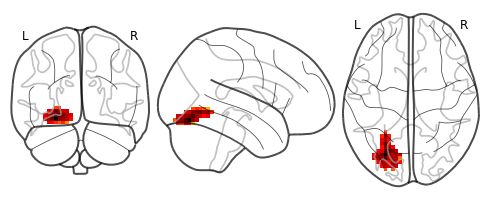

In [25]:
plotting.plot_glass_brain(striate_img, threshold=0.)

In [12]:
plotting.plot_glass_brain(striate_img)

DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See http://nilearn.github.io/manipulating_images/input_output.html.

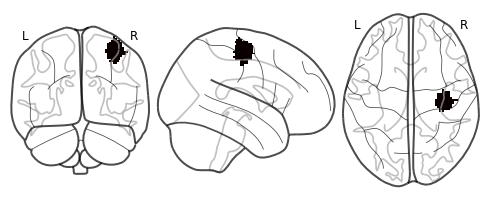

In [7]:
plotting.plot_glass_brain(r_finger_img)
r_finger_img.to_filename('data/right_finger_ROI.nii.gz')

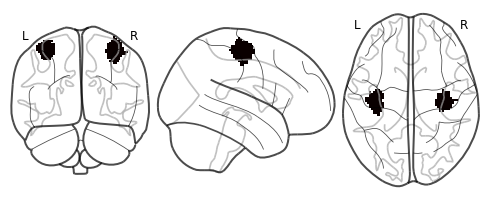

In [8]:
# Just to see them together
plotting.plot_glass_brain(b_finger_img)

In [9]:
# and save a figure for the manuscript
plotting.plot_glass_brain(b_finger_img, output_file='data/finger_rois.png')